In [1]:
%cd /home/aditya/Documents/SolarCycleProject/code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
import src.preprocesser as pre
import src.network as network
import src.plotter as plotter 
from src.hyperparams import *

# import tf.keras
%load_ext autoreload
%matplotlib inline
%load_ext tensorboard

/home/aditya/Documents/SolarCycleProject/code


In [16]:
%autoreload

In [3]:
# Getting the data
headers = ["Year",
           "Month",
           "Day",
           "Decimal Date",
           "Daily Total Sunspot Number",
           "Sunspot Number Stddev",
           "No of observations",
           "Definitive/Provisional"
]
filename = "data/SN_d_tot_V2.0.csv"
data = pd.read_csv(filename, delimiter=";", names=headers)

In [4]:
data

,Year,Month,Day,Decimal Date,Daily Total Sunspot Number,Sunspot Number Stddev,No of observations,Definitive/Provisional
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
73743,2019,11,26,2019.903,0,0.0,17,0
73744,2019,11,27,2019.905,0,0.0,12,0
73745,2019,11,28,2019.908,0,0.0,11,0
73746,2019,11,29,2019.911,0,0.0,26,0


In [5]:
# Data Preprocessing
dates, spots, inverter = pre.preprocess(data)

ymax: 528.0 ymin: 0.0
x.shape: (73741,)
y.shape: (73741,)
y values scaler: 528.0


In [6]:
if mean_type == "gaussian":
    weights = gaussian(M=mean_length, std=0.1, sym=True)
    weights /= np.sum(weights) # normalise the weights
    spots = pre.running_mean_helper(spots, weights)
elif mean_type == "uniform":
    weights = np.ones(mean_length)/mean_length
    spots = pre.running_mean_helper(spots, weights)
else:
    pass


In [7]:
X = np.diff(spots)
index = dates[1:]
x_slid, y_slid, idx_slid = pre.sliding_window_main(X, X, index)
x_train, y_train, idx_train, x_val, y_val, idx_val, x_test, y_test, idx_test = pre.data_splitting_main(x_slid, y_slid, idx_slid)

x_slid.shape: (73736, 4, 1)
y_slid.shape: (73736, 1)
x_train.shape:  (44224, 4, 1)
y_train.shape:  (44224, 1)
idx_train.shape:  (44224,)
x_val.shape:  (14752, 4, 1)
y_val.shape:  (14752, 1)
idx_val.shape:  (14752,)
x_test.shape:  (14752, 4, 1)
y_test.shape:  (14752, 1)
idx_test.shape:  (14752,)



In [8]:
net = network.create_network()

In [9]:
history = network.trainer(net, x_train, y_train, x_val, y_val, verbose=1)
# net.load_weights("models/run_200515_1236.hdf5")
var_train = np.var(y_train)
var_val = np.var(y_val)
print("Variance in y_train:", var_train)
print("Variance in y_val:", var_val)

Train on 44224 samples, validate on 14752 samples
Epoch 1/100
44224/44224 [==============================] - 9s 213us/sample - loss: 9.5238e-06 - val_loss: 3.9804e-06
Epoch 2/100
44224/44224 [==============================] - 7s 161us/sample - loss: 5.1660e-06 - val_loss: 9.2763e-06
Epoch 3/100
44224/44224 [==============================] - 8s 180us/sample - loss: 5.3551e-06 - val_loss: 1.0731e-05
Epoch 4/100
44224/44224 [==============================] - 7s 169us/sample - loss: 5.4166e-06 - val_loss: 9.8924e-06
Epoch 5/100
44224/44224 [==============================] - 7s 169us/sample - loss: 5.4311e-06 - val_loss: 8.1898e-06
Epoch 6/100
44224/44224 [==============================] - 8s 171us/sample - loss: 5.4070e-06 - val_loss: 7.0894e-06
Epoch 7/100
44224/44224 [==============================] - 8s 172us/sample - loss: 5.3824e-06 - val_loss: 6.4493e-06
Epoch 8/100
44224/44224 [==============================] - 8s 174us/sample - loss: 5.3625e-06 - val_loss: 5.9925e-06
Epoch 9/100
44

pred1.shape: (14752, 1)
pred2.shape: (44224, 1)


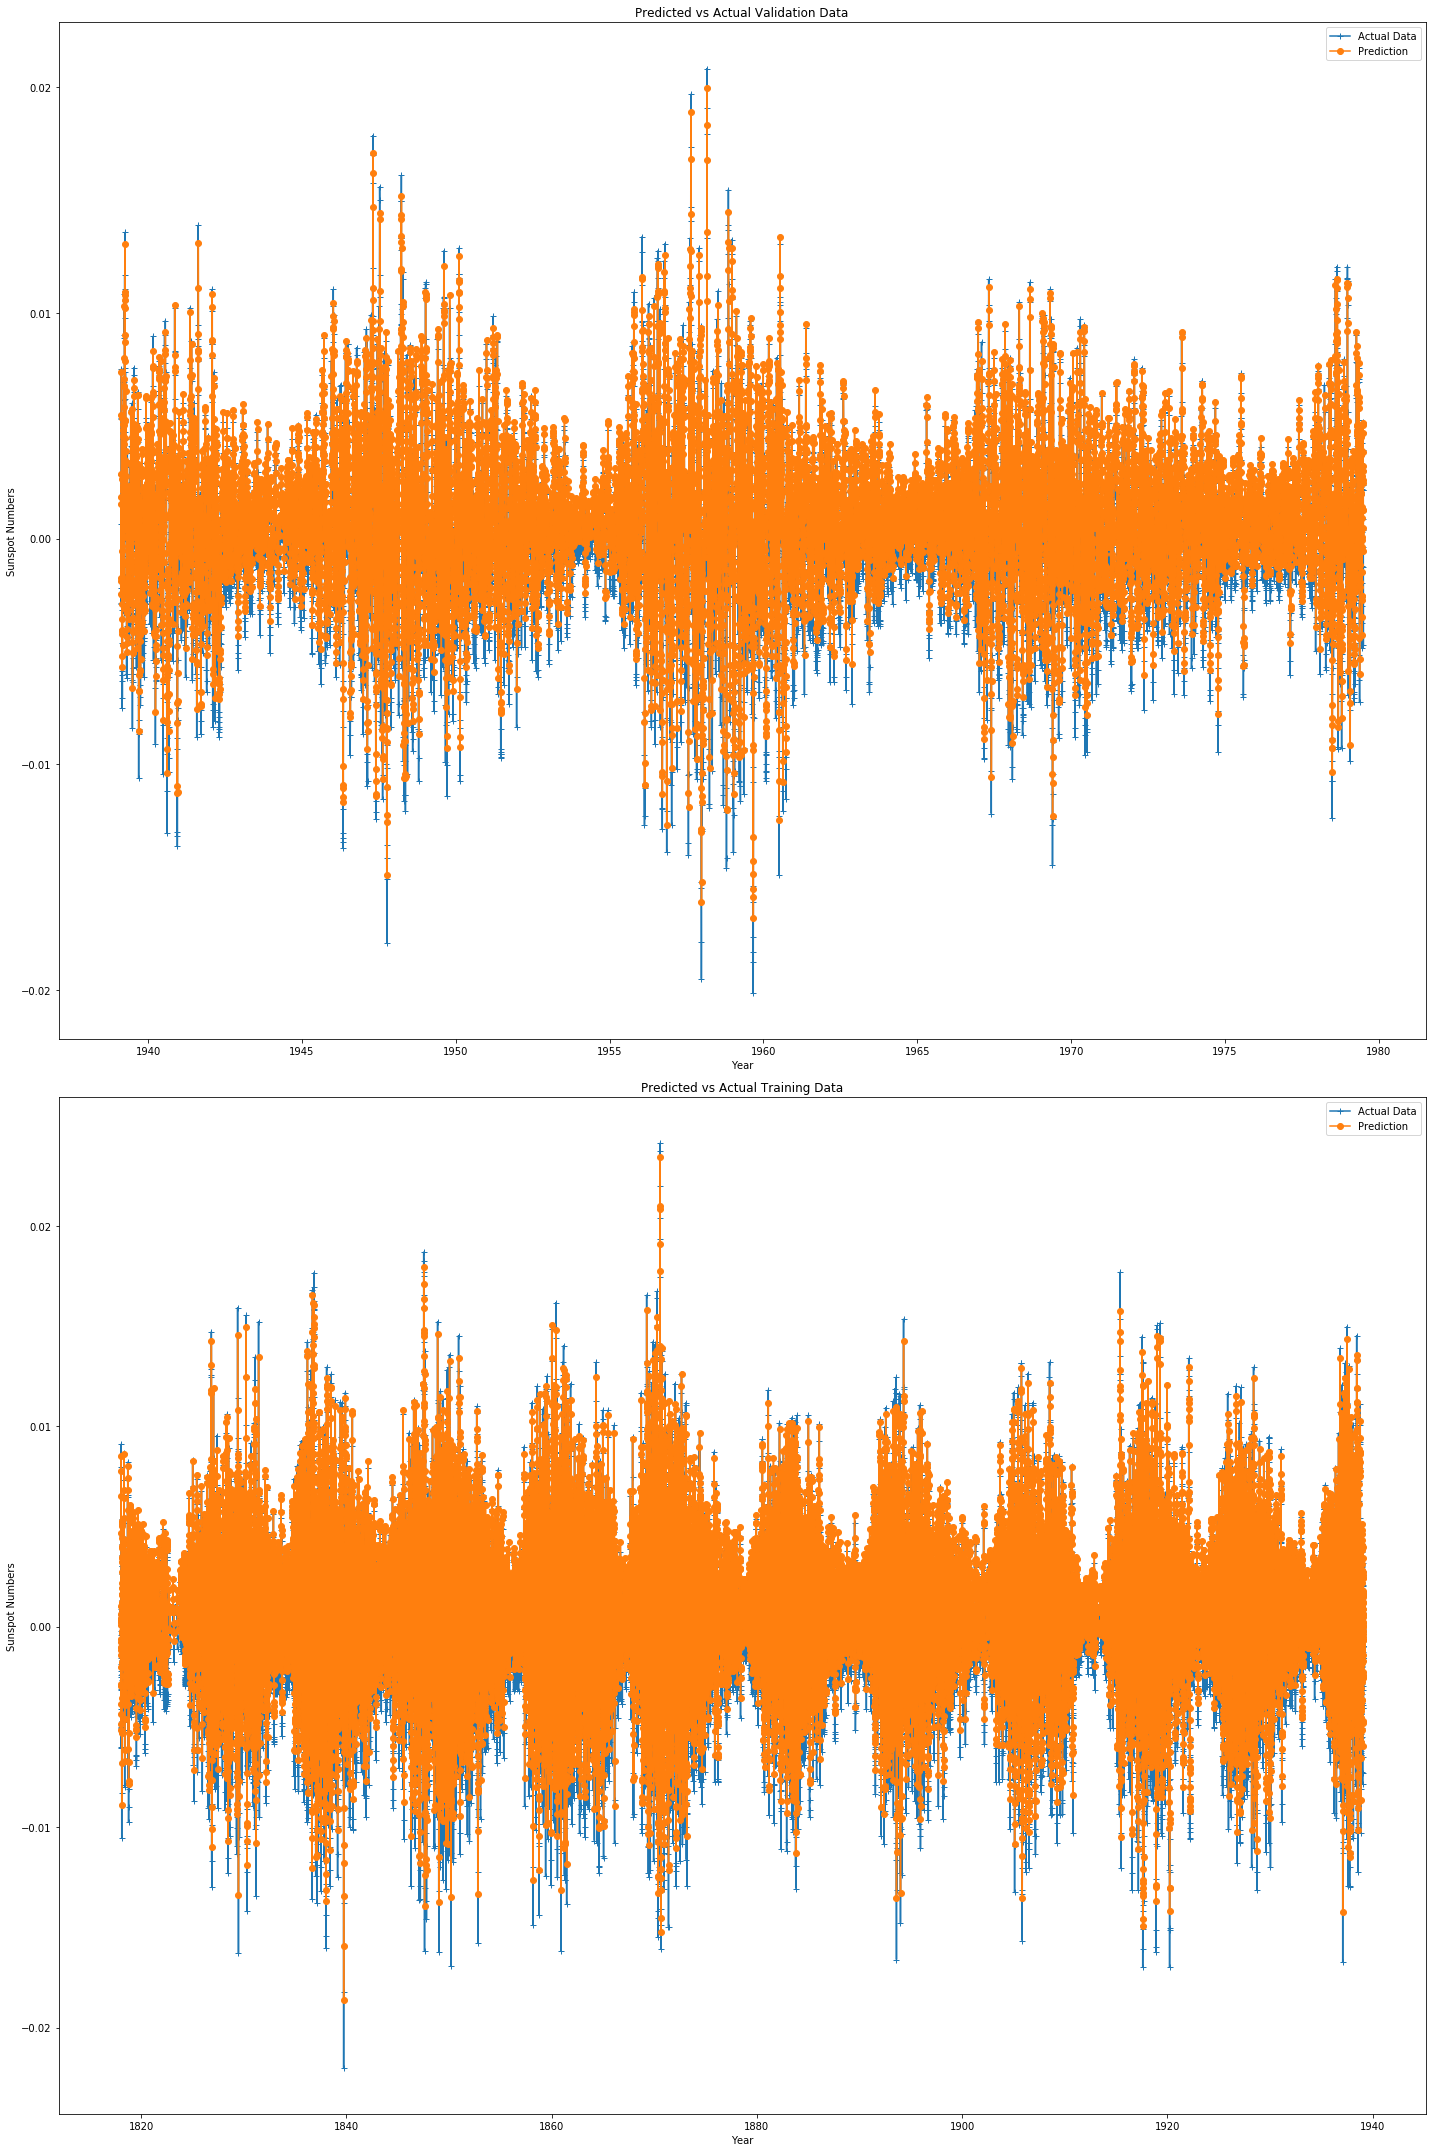

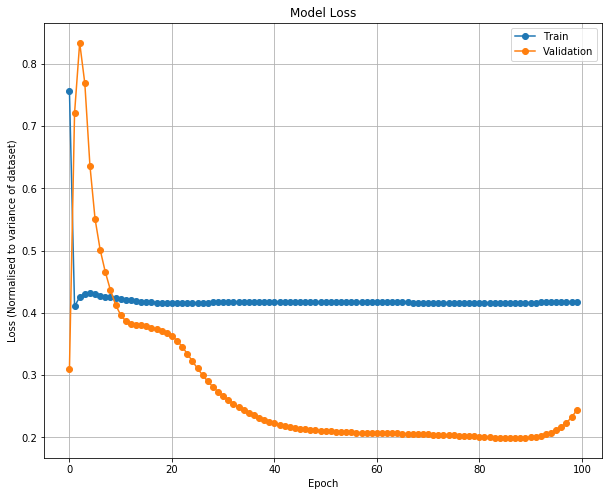

In [10]:
plotter.plot_predictions(net, x_train, y_train, idx_train, x_val, y_val, idx_val)
plotter.plot_loss_vs_epoch(history, var_train, var_val)

[array([[  0.6220717 ,  -0.25667486,   0.51363766,  -0.06554239,
           0.6027842 ,   0.5246825 ,   1.2385026 ,   0.7440754 ,
           4.9950585 ,  -3.0936277 ,  20.530468  , -10.751061  ,
           0.6934123 ,  -0.28164253,   0.05052394,   0.13449048]],
       dtype=float32),
 array([[ 3.64212871e-01,  2.95311026e-02, -2.99938861e-02,
          1.06567748e-01,  8.64080936e-02,  2.90788203e-01,
         -1.10102415e-01, -3.28392565e-01, -4.52996850e-01,
          5.08514699e-03, -2.20361662e+00, -6.23861551e+00,
         -1.98827967e-01, -4.96367775e-02,  8.27481598e-02,
          3.53475004e-01],
        [ 2.83515275e-01,  1.24585964e-01, -4.66420919e-01,
         -5.82253095e-03, -2.06923056e-02, -1.87257499e-01,
          2.69618064e-01,  2.87578493e-01,  1.43305683e+00,
         -9.45552409e-01,  3.81268501e+00,  1.12675153e-01,
          3.41426164e-01, -4.05329764e-01, -4.79075223e-01,
         -6.47176132e-02],
        [-3.35595310e-02, -5.94244301e-02,  5.85058689e-01,
 

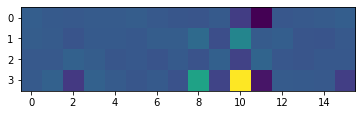

In [11]:
weights = net.get_weights()
plt.imshow(weights[1])
weights

In [ ]:
predictor = network.create_network(predictor=True)
predictor.set_weights(net.get_weights())

idx_step = np.average(np.diff(idx_slid))
x_start = x_train[:batch_size, :, :]
idx_start = idx_train[:batch_size]
idx_end = idx_train[-1]
args = (
    predictor,
    x_start,
    idx_start,
    idx_end,
    idx_step
)
predictor.reset_states()
# net.reset_states()
npred = predictor.predict(x_train, batch_size=1)
rpred, idx_rpred = network.predict_from_self(*args)
# loss_func = keras.losses.MeanSquaredError()
# print("Loss: %.4f" % loss_func(y_train, rpred))

Going to enter the loop now.
num_iters: 44225
timesteps: 4


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(idx_train, y_train, label="Actual Value", marker="+")
plt.plot(idx_rpred, rpred, label="Recursive Prediction", marker="o")
# plt.plot(x_start[:, 1], marker="s")
# plt.plot(predictor.predict(x_start, batch_size=1), marker=".")
plt.plot(idx_train, npred, label="Normal Prediction", marker="x")

plt.xlabel("Date")
plt.ylabel("Normalised Sunspot Numbers")
plt.legend()

In [ ]:
print("x:", x_train[:2, :])
print("y:", y_train[:2])

In [ ]:
diff_train = y_train - net.predict(x_train)
plt.plot(idx_train, diff_train)

In [ ]:
diff_train_shift = y_train[:-1] - net.predict(x_train)[1:]
plt.plot(idx_train[1:], diff_train_shift)

In [ ]:
%tensorboard --logdir logs/fit